<a href="https://colab.research.google.com/github/MeeGyo/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
from sklearn.datasets import load_digits #scikit-learn

digits = load_digits()
X = digits.data
y = digits.target

print("Shape of data:", X.shape)
print("Shape of target:", y.shape)
print("Number of classes:", len(digits.target_names))
print("First 5 target labels:", y[:5])

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10
First 5 target labels: [0 1 2 3 4]


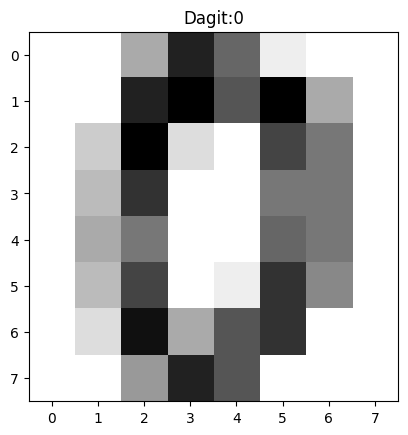

In [2]:
import matplotlib.pyplot as plt

first_image = X[0]
first_label = y[0]

image_reshaped = first_image.reshape((8, 8))
plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Dagit:{first_label}')
plt.show()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.shape

(1797, 65)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
X.shape

(1797, 64)

แบ่ง data (อาจารย์บอกว่าแบ่งตามใจเรา)

In [7]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

# Model Construction
- import
- define (hyper-parameters)
- train (fitting)
- evaluate (train vs test)

## import

In [8]:
from sklearn.tree import DecisionTreeClassifier

## define

In [9]:
tree0 = DecisionTreeClassifier(random_state=6)

## Training

In [10]:
tree0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

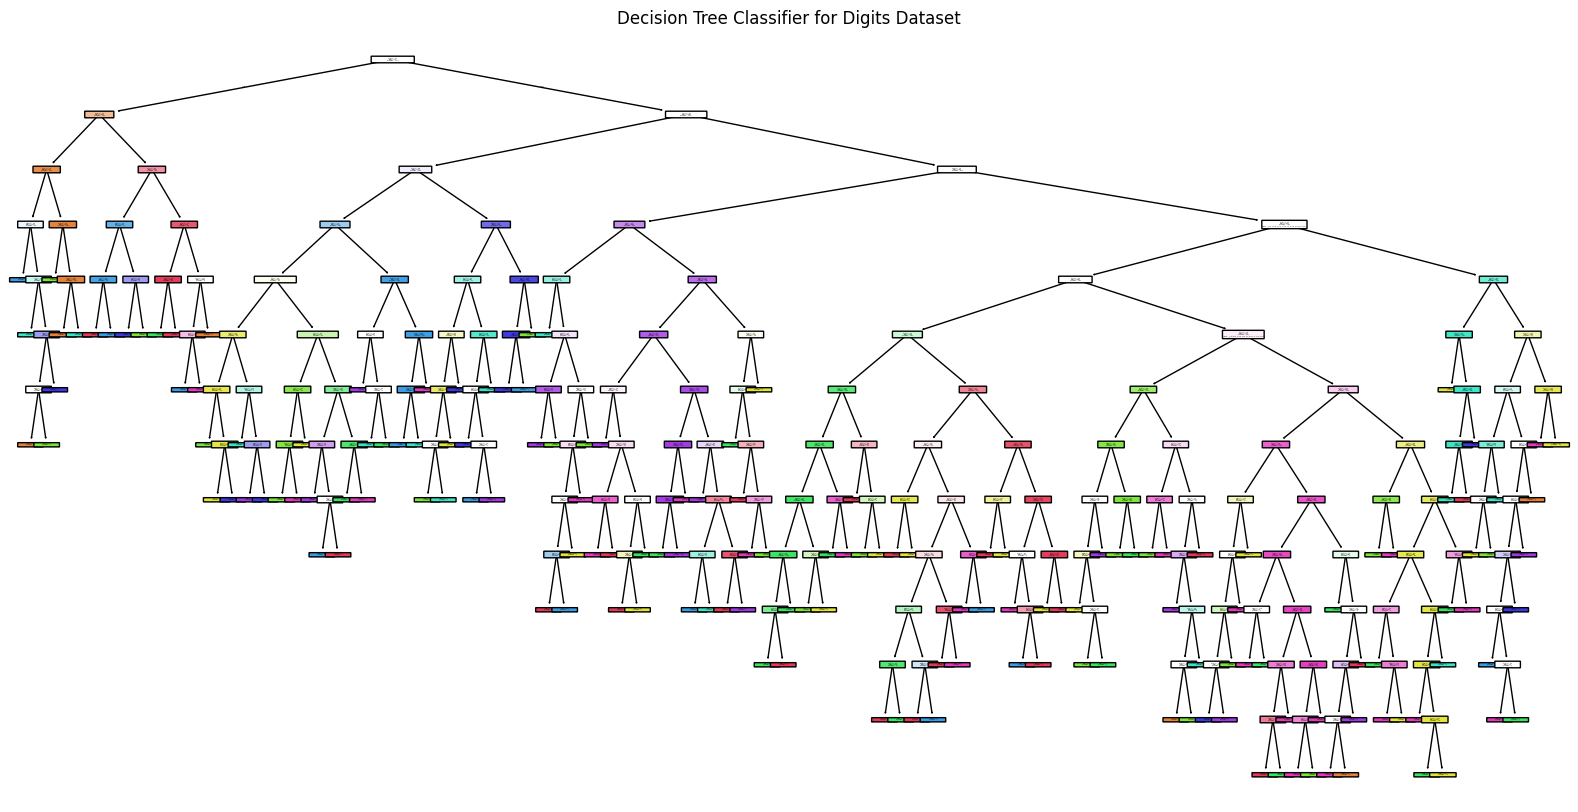

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree0, filled=True, rounded=True)
plt.title("Decision Tree Classifier for Digits Dataset")
plt.show()

## Evaluate

In [12]:
y_predict =tree0.predict(X_test)
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [13]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7938


## Pre-Pruning(hyper-parameters tuning)

หากปล่อยให้ต้นไม้โตไปเรื่อยๆ >> fit noise

ดังนั้นต้อง Pre-Pruning

In [15]:
from sklearn.tree import DecisionTreeClassifier #import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) #define
tree1.fit(X_train,y_train) #train

DecisionTreeClassifier(max_depth=3, random_state=6)

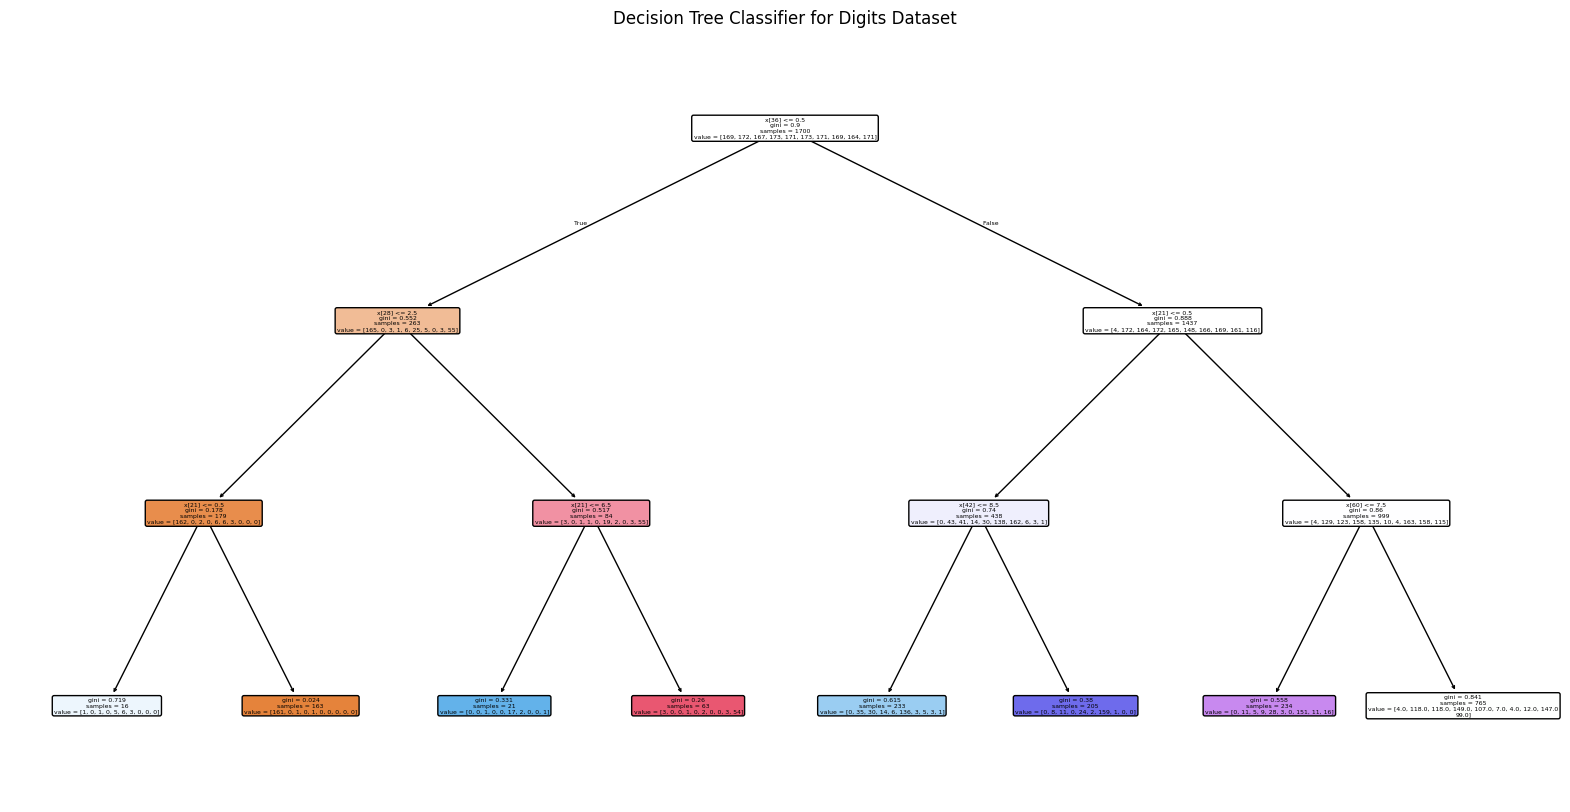

In [16]:
plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, rounded=True)
plt.title("Decision Tree Classifier for Digits Dataset")
plt.show()

In [17]:
# Evaluate
y_predict1 =tree1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predict1)
accuracy1

0.4639175257731959

tree2

In [18]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) #define
tree2.fit(X_train,y_train) #train
y_predict2 =tree2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predict2)
accuracy2

0.7938144329896907

# Quiz 11

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(
    random_state=6,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='entropy'
)
tree3.fit(X_train,y_train)
y_predict3 =tree3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predict3)
accuracy3

0.9072164948453608

#Model Selection and Evaluation

create a workflow composed of
1.train and test splitting which train and test have the same class distribution  
2. in train data, we split it into 10-fold
3.perform cross validation and grid search (10KNN and 10 decision trees)
4. use Accuracy as a metric
5. Evaluate the best model retain with test set and report

# Task
Perform model selection and evaluation on the `digits` dataset by first splitting the data (`X`, `y`) into training and testing sets with stratified sampling to maintain class distribution. Then, set up 10-fold cross-validation on the training data. Define K-Nearest Neighbors (KNN) and Decision Tree classifiers, along with their respective hyperparameter grids. Conduct a grid search with cross-validation for both models, using accuracy as the scoring metric. Finally, evaluate the best model found by the grid search on the unseen test set, reporting its accuracy and other relevant metrics.

## Stratified Train-Test Split

### Subtask:
Split the dataset into training and testing sets, ensuring that both sets have the same class distribution.


**Reasoning**:
To perform a stratified train-test split, I will import the `train_test_split` function from `sklearn.model_selection` and apply it to the `X` and `y` data with the specified parameters.



In [20]:
from sklearn.model_selection import train_test_split

X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train_stratified:", X_train_stratified.shape)
print("Shape of X_test_stratified:", X_test_stratified.shape)
print("Shape of y_train_stratified:", y_train_stratified.shape)
print("Shape of y_test_stratified:", y_test_stratified.shape)

Shape of X_train_stratified: (1437, 64)
Shape of X_test_stratified: (360, 64)
Shape of y_train_stratified: (1437,)
Shape of y_test_stratified: (360,)


## Setup K-Fold Cross-Validation

### Subtask:
Prepare the training data for 10-fold cross-validation.


**Reasoning**:
To set up K-Fold cross-validation, I need to import the `StratifiedKFold` class from `sklearn.model_selection` and then instantiate it with the specified parameters to ensure stratified splitting and reproducibility.



In [21]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("StratifiedKFold instance created.")

StratifiedKFold instance created.


## Define Models and Hyperparameter Grids

### Subtask:
Define K-Nearest Neighbors (KNN) and Decision Tree classifiers, along with their respective hyperparameter grids for the grid search.

**Reasoning**:
Now that the subtask has been introduced, I will import the necessary libraries (`KNeighborsClassifier` and `DecisionTreeClassifier`) and define the models along with their hyperparameter grids as requested.



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define KNN Classifier and its parameter grid
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Define Decision Tree Classifier and its parameter grid
dtc = DecisionTreeClassifier(random_state=42)
dtc_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

print("KNN and Decision Tree classifiers and their parameter grids defined.")

KNN and Decision Tree classifiers and their parameter grids defined.


## Perform Grid Search with Cross-Validation

### Subtask:
Conduct a grid search with 10-fold cross-validation for both K-Nearest Neighbors (KNN) and Decision Tree classifiers, using accuracy as the scoring metric. Store the results for further analysis.

**Reasoning**:
With the models and hyperparameter grids defined, I will now use `GridSearchCV` to perform a comprehensive grid search with 10-fold cross-validation for both KNN and Decision Tree classifiers, evaluating them based on accuracy.



In [23]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search for KNN
grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_stratified, y_train_stratified)

# Perform Grid Search for Decision Tree
grid_search_dtc = GridSearchCV(dtc, dtc_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_dtc.fit(X_train_stratified, y_train_stratified)

print("Grid search completed for both KNN and Decision Tree.")

Grid search completed for both KNN and Decision Tree.


## Identify Best Models from Grid Search

### Subtask:
Extract the best estimators and their corresponding best scores for both K-Nearest Neighbors (KNN) and Decision Tree classifiers from the grid search results.

**Reasoning**:
To identify the best models and their scores, I will access the `best_estimator_` and `best_score_` attributes from the `grid_search_knn` and `grid_search_dtc` objects, and print them out.



In [24]:
print("Best KNN Estimator:", grid_search_knn.best_estimator_)
print("Best KNN Score:", grid_search_knn.best_score_)

print("Best Decision Tree Estimator:", grid_search_dtc.best_estimator_)
print("Best Decision Tree Score:", grid_search_dtc.best_score_)

Best KNN Estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
Best KNN Score: 0.9874660062160064
Best Decision Tree Estimator: DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)
Best Decision Tree Score: 0.8518210955710955


## Evaluate Best Model on Test Set

### Subtask:
Evaluate the best model found by the grid search on the unseen test set, reporting its accuracy and other relevant metrics.

**Reasoning**:
Based on the `Best KNN Score` and `Best Decision Tree Score`, KNN had a higher accuracy (0.987) compared to Decision Tree (0.852) on the training set during cross-validation. Therefore, I will select the best KNN model to evaluate on the unseen test set. I will use `accuracy_score` to report the performance.



In [25]:
from sklearn.metrics import accuracy_score

# Determine the best overall model
if grid_search_knn.best_score_ > grid_search_dtc.best_score_:
    best_model = grid_search_knn.best_estimator_
    model_name = "K-Nearest Neighbors"
else:
    best_model = grid_search_dtc.best_estimator_
    model_name = "Decision Tree"

# Evaluate the best model on the unseen test set
y_pred_test = best_model.predict(X_test_stratified)
accuracy_test = accuracy_score(y_test_stratified, y_pred_test)

print(f"The best model is: {model_name}")
print(f"Accuracy of the best model on the test set: {accuracy_test:.4f}")

The best model is: K-Nearest Neighbors
Accuracy of the best model on the test set: 0.9861


## Summary:

### Q&A
The best model found, a K-Nearest Neighbors classifier, achieved an accuracy of 0.9861 on the unseen test set.

### Data Analysis Key Findings
*   The dataset was successfully split into stratified training (1437 samples) and testing (360 samples) sets, with an 80/20 ratio.
*   10-fold stratified cross-validation was set up to ensure robust model evaluation.
*   Grid search identified the best hyperparameters for both KNN and Decision Tree models based on accuracy during cross-validation:
    *   The best KNN model, `KNeighborsClassifier(n_neighbors=3, weights='distance')`, achieved a cross-validation accuracy of approximately 0.9875.
    *   The best Decision Tree model, `DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=42)`, achieved a cross-validation accuracy of approximately 0.8518.
*   The K-Nearest Neighbors model was selected as the overall best model due to its higher cross-validation score.
*   The chosen best model (KNN) achieved an accuracy of 0.9861 on the unseen test set, indicating strong generalization performance.

### Insights or Next Steps
*   The K-Nearest Neighbors model with `n_neighbors=3` and `weights='distance'` is highly effective for classifying the `digits` dataset, demonstrating excellent generalization performance on unseen data.
*   Given the high accuracy of KNN, further investigation could involve exploring other distance metrics or more advanced ensemble methods like Random Forests or Gradient Boosting, which might offer comparable performance with potentially better interpretability or robustness.
